# Notebook for Text Analysis
## Author: Sanittawan Tan
## Date: March 12, 2020

- build a text classifier

## install required libraries

In [0]:
!pip install pythainlp

     |████████████████████████████████| 11.1MB 4.6MB/s 
     |████████████████████████████████| 1.5MB 41.2MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449905 sha256=c076a3b1659496cf5a5fe053a3ee48ee82ff20df217920911e077dc3dc70976c
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


In [0]:
!pip install deepcut

In [0]:
!pip install emoji

In [0]:
!pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

  Cloning git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git to /tmp/pip-req-build-nima8n8u
  Running command git clone -q git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git /tmp/pip-req-build-nima8n8u
     |████████████████████████████████| 5.5MB 4.3MB/s 
     |████████████████████████████████| 122kB 48.0MB/s 
     |████████████████████████████████| 460kB 51.9MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 32.8MB 124kB/s 
     |████████████████████████████████| 481kB 47.2MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
     |████████████████████████████████| 3.1MB 36.7MB/s 
     |████████████████████████████████| 870kB 52.8MB/s 
     |████████████████████████████████| 1.0MB 39.1MB/s 
  Created wheel for lucem-illud-2020: filename=lucem_illud_2020-8.0.1-cp36-none-any.whl size=35151 sha256=d5a81581119dd6566f6adaf6c4023a670

## Import stuff

In [0]:
import pandas as pd
import deepcut
import pythainlp
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm 
import seaborn as sns
import lucem_illud_2020

## Load Files

In [0]:
f_sample_df = pd.read_csv('sample_train_set.csv', encoding='utf-8')
print(f_sample_df.shape)

(193, 17)


In [0]:
test_df = pd.read_csv('sample_test_set.csv', encoding='utf-8')
print(test_df.shape)

(82, 17)


## Pre-processing (tokenization etc.)

Note on a dicision to be made: should I get rid of hash tags? 

In [0]:
f_sample_df['text']

0      สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...
1      เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...
2      ข่าวปลอม  ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...
3      กระผมหนึ่งในพลเมืองคนไทย ขอเป็นกำลังใจให้คุณหม...
4      ขอร้องทุกคนช่วยเสพสื่ออย่างมีสติ อย่าแชร์ข่าวป...
                             ...                        
188    ถ้ายังมั่นใจว่าประเทศไทยคือระบอบประชาธิปไตย คว...
189    ทหารใกล้เกษียณ ถ้าอยากอยู่บ้านหลวงฟรีหลังเกษีย...
190    เมื่อไหร่ เราจะมีระบบแจ้งเตือน ประมานว่าตอนนี้...
191    ติดเทรนด์แถบข้างแล้ว \nเชี่ย ไอโอ ดูไว้ อันนี้...
192    แล้วก็จะมีสื่อโง่ๆแคปไปลง ปชชแห่ให้กำลังใจรัฐบ...
Name: text, Length: 193, dtype: object

In [0]:
test_df['text']

0     ประเทศไทย ชีวิตดีดีที่ลงตัว #รัฐบาลเตรียมพร้อม...
1     มันน่าจะมีวิธีMove onที่ดี สร้างสรรค์และสร้างพ...
2     โง่ก็พากันลาออกไปอีควาย ยิ่งอยู่ยิ่งโชว์โง่ #ร...
3                          โธ่อีควาย #รัฐบาลเตรียมพร้อม
4     #รัฐบาลเตรียมพร้อม เตรียมพร้อมจากไปน่ะสิ ยินดี...
                            ...                        
77    เตรียมพร้อมอะยัยเหย๋อออออ #รัฐบาลเตรียมพร้อม h...
78    พวก IO ก็คงไม่อยากจะโป๊ะแตกหรอก แต่เขาคิดคำมาอ...
79    ทหารเป็นได้ทุกอย่าจริงๆ #ไวรัสโคโรนาสายพันธุ์ใ...
80    ตามข่าวเเละคัดกรองข่าวดีๆ\n#ไวรัสโคโรนา\n#ไวรั...
81    3 จังหวัดชายแดนใต้ เจอแบบนี้ทุกวันจนชิน 3จังหว...
Name: text, Length: 82, dtype: object

In [0]:
# training set
f_sample_df['tokenized_text'] = f_sample_df['text'].apply(lambda x: deepcut.tokenize(x))

In [0]:
f_sample_df.tail(2)

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO,tokenized_text
191,0,0,0,GrahAnimation,Kritsana Assadong,ติดเทรนด์แถบข้างแล้ว \nเชี่ย ไอโอ ดูไว้ อันนี้...,2020-02-13 18:06:49,1888,145,2920,Thailand,10527,1029660114158989312,2018-08-15 02:24:00,560 days 21:36:00.000000000,560,0,"[ติด, เทรนด์, แถบ, ข้าง, แล้ว, \n, เชี่ย, , ..."
192,0,0,0,eibbbb,เอิ่บ,แล้วก็จะมีสื่อโง่ๆแคปไปลง ปชชแห่ให้กำลังใจรัฐบ...,2020-02-13 18:34:06,542,116,92484,NaN,133900,1107665196254781440,2019-03-18 08:28:00,345 days 15:32:00.000000000,345,0,"[แล้ว, ก็, จะ, มี, สื่อ, โง่, ๆ, แคป, ไป, ลง, ..."


In [0]:
from pythainlp.util import normalize

def normalize_words(tokenized_textlist):
  normal = []
  for word in tokenized_textlist:
    if word in ['#', ' ', 'ๆ']:
      continue
    word = word.strip()
    norm_word = normalize(word)
    normal.append(norm_word)
  return normal

# this is an example

normal = []
for word in f_sample_df.iloc[0]['tokenized_text']:
  if word in ['#', ' ', 'ๆ']:
    continue
  word = word.strip()
  norm_word = normalize(word)
  normal.append(norm_word)
normal

['สู้',
 'นะ',
 'ครับ',
 'เป็น',
 'กำลังใจ',
 'ให้',
 'เจ้าหน้าที่',
 'ทุก',
 'คน',
 'มัน',
 'เหนื่อย',
 'จริง',
 '#ไวรัสโคโรนา',
 '#ไวรัส',
 'อู่ฮั่น',
 '#รัฐบาล',
 'เตรียม',
 'พร้อม',
 'เสพ',
 'สื่อ',
 'อย่าง',
 'มี',
 'สติ',
 '#อย่า',
 'ตื่นตระหนก',
 '#ทหาร',
 'ที่',
 'พึ่ง',
 'ของ',
 'ประชาชน',
 'ทุก',
 'โอกาส']

In [0]:
'ต่่่อ\n'.strip()

'ต่่่อ'

In [0]:
f_sample_df['normalized_text'] = f_sample_df['tokenized_text'].apply(lambda x: normalize_words(x))

In [0]:
f_sample_df.head()

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO,tokenized_text,normalized_text
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1,"[สู้, ๆ, , นะ, ครับ, , เป็น, กำลังใจ, ให้, ...","[สู้, นะ, ครับ, เป็น, กำลังใจ, ให้, เจ้าหน้าที..."
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36,22,2673,NaN,770,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,"[เพื่อ, รักษา, , และ, , ระวัง, ป้องกัน, , เ...","[เพื่อ, รักษา, และ, ระวัง, ป้องกัน, เจ้าหน้าที..."
2,1,1,1,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:46:25,38,5,1234,NaN,21,1219487869049307136,2020-01-20 21:12:00,37 days 02:48:00.000000000,37,1,"[ข่าว, ปลอม, , , ไม่, จริง, , ไม่, ควร, แชร...","[ข่าว, ปลอม, ไม่, จริง, ไม่, ควร, แชร์, ต่อ, #..."
3,1,1,1,trueman98587845,trueman,กระผมหนึ่งในพลเมืองคนไทย ขอเป็นกำลังใจให้คุณหม...,2020-01-31 3:22:40,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1,"[กระผม, หนึ่ง, ใน, พลเมือง, คน, ไทย, , ขอ, เป...","[กระผม, หนึ่ง, ใน, พลเมือง, คน, ไทย, ขอ, เป็น,..."
4,1,1,1,thaiprong,รวมใจไทยปรองดอง,ขอร้องทุกคนช่วยเสพสื่ออย่างมีสติ อย่าแชร์ข่าวป...,2020-01-28 8:28:56,304,99,78,NaN,395,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,"[ขอร้อง, ทุก, คน, ช่วย, เสพ, สื่อ, อย่าง, มี, ...","[ขอร้อง, ทุก, คน, ช่วย, เสพ, สื่อ, อย่าง, มี, ..."


In [0]:
# combine all steps in one place 
f_sample_df['tokenized_text'] = f_sample_df['text'].apply(lambda x: deepcut.tokenize(x))
f_sample_df['normalized_text'] = f_sample_df['tokenized_text'].apply(lambda x: normalize_words(x))

In [0]:
# test set 
test_df['tokenized_text'] = test_df['text'].apply(lambda x: deepcut.tokenize(x))
test_df['normalized_text'] = test_df['tokenized_text'].apply(lambda x: normalize_words(x))

In [0]:
test_df.head(2)

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO,tokenized_text,normalized_text
0,0,0,0,Fai_Animajus,🗝ᗋᴺᴵᴹ ᐞ Ġ ✿ † I ઽ † ᗋ Ỵ ⁷ ⁹ 🎧,ประเทศไทย ชีวิตดีดีที่ลงตัว #รัฐบาลเตรียมพร้อม...,2020-02-14 4:00:00,629,692,61918,Thailand,135911,730189272792227840,2016-05-10 17:14:00,1387 days 06:46:00.000000000,1387,0,"[ประเทศไทย, , ชีวิต, ดีดี, ที่, ลงตัว, , #, ...","[ประเทศไทย, ชีวิต, ดีดี, ที่, ลงตัว, รัฐบาล, เ..."
1,0,0,0,CottageNongnoo7,Liberty Girl,มันน่าจะมีวิธีMove onที่ดี สร้างสรรค์และสร้างพ...,2020-02-15 3:51:35,136,54,2763,NaN,195,880680765796888576,2017-06-29 23:53:00,972 days 00:07:00.000000000,972,0,"[มัน, น่า, จะ, มี, วิธี, Move, , on, ที่, ดี,...","[มัน, น่า, จะ, มี, วิธี, Move, on, ที่, ดี, สร..."


In [0]:
# non-specialized tokenization does not work with Thai!
# from sklearn.feature_extraction.text import TfidfVectorizer

# TFVectorizer = TfidfVectorizer(max_df=100, min_df=2, max_features=1000, norm='l2')
# TFVects = TFVectorizer.fit_transform(f_sample_df['text'])

In [0]:
f_sample_df.iloc[0]['text']

'สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มันเหนื่อยจริงๆ #ไวรัสโคโรนา #ไวรัสอู่ฮั่น #รัฐบาลเตรียมพร้อม #เสพสื่ออย่างมีสติ #อย่าตื่นตระหนก #ทหารที่พึ่งของประชาชนทุกโอกาส'

In [0]:
from pythainlp.ulmfit import process_thai

Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


100%|██████████| 1050919089/1050919089 [00:38<00:00, 27435847.59it/s]


Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


100%|██████████| 1530484/1530484 [00:00<00:00, 6072502.41it/s]


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,1), min_df=5, sublinear_tf=True)
TFVects = tfidf.fit_transform(f_sample_df['text'])

In [0]:
tfidf.vocabulary_

{'\n': 0,
 '  ': 1,
 '"': 2,
 '#': 3,
 '&': 4,
 '.': 5,
 '/': 6,
 '0': 7,
 '1': 8,
 '10': 9,
 '2': 10,
 '2019': 11,
 '2020': 12,
 '3': 13,
 '4': 14,
 '436': 15,
 '5': 16,
 '9': 17,
 ':': 18,
 '=': 19,
 '?': 20,
 '_': 21,
 'afncthailand': 22,
 'd': 23,
 'daengbile': 24,
 'f': 25,
 'fake': 26,
 'fakenews': 27,
 'html': 28,
 'http': 29,
 'https': 30,
 'io': 31,
 'news': 32,
 'pic': 33,
 'status': 34,
 'valentinesday': 35,
 'xxrep': 36,
 'xxurl': 37,
 '\xa0…': 38,
 'กน': 39,
 'กรอง': 40,
 'กระผม': 41,
 'กราด': 42,
 'กว่า': 43,
 'กัน': 44,
 'กับ': 45,
 'การ': 46,
 'การป้องกัน': 47,
 'กำลังใจ': 48,
 'กี่': 49,
 'กู': 50,
 'ก็': 51,
 'ก่อน': 52,
 'ขอ': 53,
 'ของ': 54,
 'ขอบคุณ': 55,
 'ขอให้': 56,
 'ขึ้น': 57,
 'ข่าว': 58,
 'ค': 59,
 'คน': 60,
 'คนไทย': 61,
 'ครับ': 62,
 'ควร': 63,
 'ความ': 64,
 'ความตื่นตัว': 65,
 'คัด': 66,
 'คิด': 67,
 'คือ': 68,
 'คุณหญิง': 69,
 'คุณหมอ': 70,
 'จริง': 71,
 'จริงๆ': 72,
 'จะ': 73,
 'จาก': 74,
 'จุด': 75,
 'จุฬา': 76,
 'ช่วย': 77,
 'ซวย': 78,
 'ซอย': 79,
 'ณ

In [0]:
print(TFVects.shape)
print(f_sample_df.shape)

(193, 225)
(193, 19)


## Try k-Means clustering

In [0]:
from sklearn.cluster import KMeans
numClusters = 2
km = KMeans(n_clusters=numClusters, init='k-means++')
km.fit(TFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
terms = tfidf.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 #
 รัฐบาล
 เตรียมพร้อม
 /
 

 พร้อม
 ที่
 แล้ว
 ก็
 มา


Cluster 1:
 ไวรัส
 

 #
 /
 นา
 โร
 โค
 มีสติ
 ตื่นตระหนก
 เสพ




In [0]:
def plotSilhouette(n_clusters, X, reduced_data):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    # save fig to disk 
    plt.savefig('kmeans' + str(n_clusters) + '.png', dpi=300)
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(TFVects.toarray())
reduced_data = pca.transform(TFVects.toarray())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


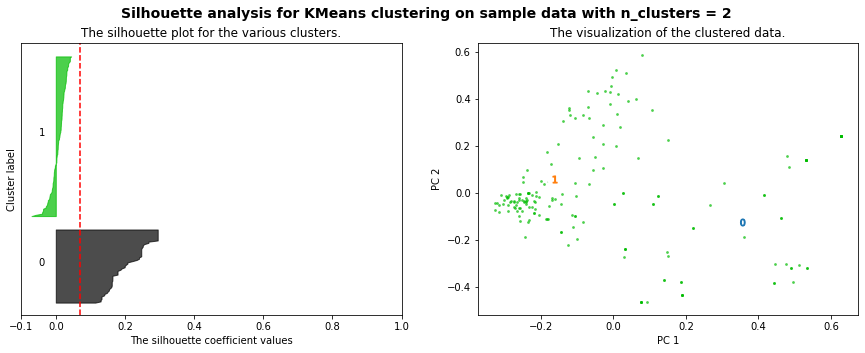

For n_clusters = 2, The average silhouette_score is : 0.071


In [0]:
# plot with 2 clusters
# looks like there are 2 different clusters definitely
plotSilhouette(2, TFVects.toarray(), reduced_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


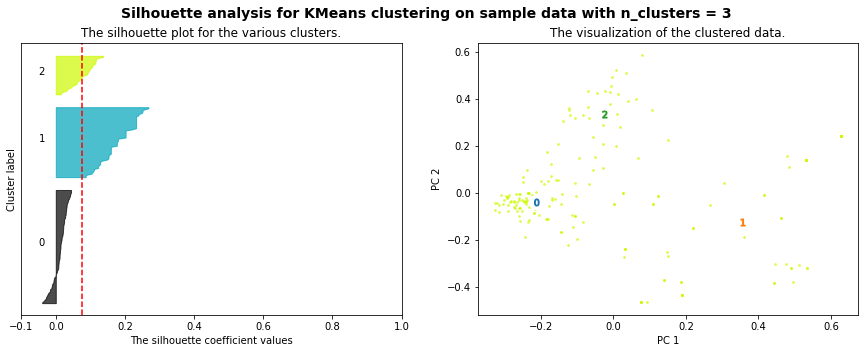

For n_clusters = 3, The average silhouette_score is : 0.077


In [0]:
# 3 clusters also look good
plotSilhouette(3, TFVects.toarray(), reduced_data)

## Build a classifier

In [0]:
import keras

Using TensorFlow backend.


In [0]:
X = TFVects.toarray()

In [0]:
y = f_sample_df['is_IO']
print(y.shape)

(193,)


In [0]:
# need to retrieve predicted probabilities from metadata 
# from the full trainset
full_train_df = pd.read_csv('full_train_set.csv', encoding='utf-8')
print(full_train_df.columns)
training_subset = full_train_df.iloc[:193]
testing_subset = full_train_df.iloc[193:]

Index(['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname', 'text',
       'timestamp', 'following', 'followers', 'num_tweets', 'location',
       'num_likes', 'id', 'date_joined', 'num_days_joined', 'days_on_twitter',
       'is_IO', 'IO_meta_clf', 'isIO_meta_prob'],
      dtype='object')


In [0]:
# do PCA to see how many dimensions to reduce to
pca = PCA()
new_reduced_data = pca.fit_transform(X)

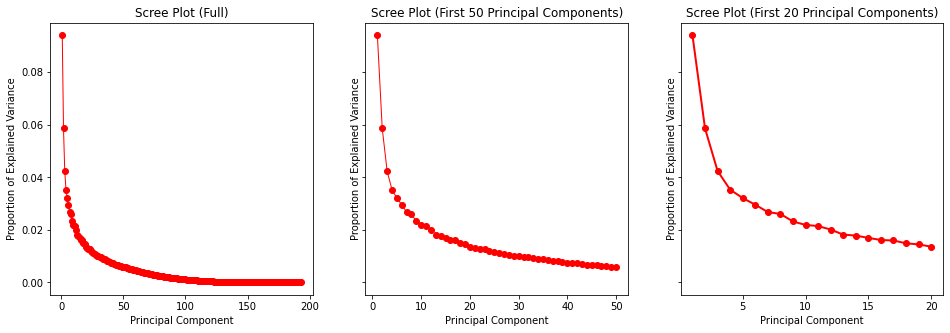

In [0]:
# Make a scree plot to look at the dimension
n = len(f_sample_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.savefig('PCA_scree' + '.png', dpi=300)
plt.show()


The scree plot shows that the number of dimensions that seem to be important is between 3 and 5. 2-3 dimensions appear to have the largest decrease in the proportioned of explained variance.

In [0]:
# We will go with 3
pca_3d = PCA(n_components=3)
new_reduced_data = pca_3d.fit_transform(X)

In [0]:
new_reduced_data.shape

(193, 3)

In [0]:
X_mix = np.concatenate((new_reduced_data, training_subset['isIO_meta_prob'].values.reshape(193,1)), axis=1)

In [0]:
# training_subset['isIO_meta_prob'].values

In [0]:
# cross validation score pipeline
# default scorer to accuracy rate (can be changed to other things)
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

naiveBayes = BernoulliNB()
bayes_cv_list = cross_val_score(naiveBayes, X_mix, y, cv=5)
bayes_cv_mean = np.mean(bayes_cv_list)
print("average 5-fold:", bayes_cv_mean)

average 5-fold: 0.8446693657219972


In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#probability = True is slower but lets you call predict_proba()
svm_cv_list = cross_val_score(svm, X_mix, y, cv=5)
svm_cv_mean = np.mean(svm_cv_list)
print(svm_cv_list)
print("average 5-fold:", svm_cv_mean)

[0.92307692 1.         1.         1.         1.        ]
average 5-fold: 0.9846153846153847


In [0]:
from sklearn.svm import LinearSVC
linSVC = LinearSVC()
linsvc_cv_list = cross_val_score(linSVC, X_mix, y, cv=5)
linsvc_cv_mean = np.mean(linsvc_cv_list)
print("average 5-fold:", linsvc_cv_mean)

average 5-fold: 0.9846153846153847


SVM already performs very impressviely on this data set with 5-fold accuracy rate of 98%. I will go with SVM for the time being and use it to evaluate the test set.

In [0]:
TFVects_test = tfidf.fit_transform(test_df['text'])

In [0]:
X_test = TFVects_test.toarray()
reduced_X_test = pca_3d.fit_transform(X_test)

In [0]:
X_test_mix = np.concatenate((reduced_X_test, 
                             testing_subset['isIO_meta_prob'].values.reshape(82,1)), axis=1)
y_test = test_df['is_IO']

In [0]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_mix, y)
y_test_pred = svm.predict(X_test_mix)
y_test_prob = svm.predict_proba(X_test_mix)

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

1.0


In [0]:
# the final model is svm
# this is already trained
# can be used with the full data set to classify accounts

## Classify the full data set

Steps
1. grab the meta data predicted probabilities from the full data set -> save it in a numpy array
2. generate tf-idf vector of the texts
3. reduce data -> do pca on the full data set by projecting the data on the same space as the training
4. combine 1 and 2 
5. call svm and fit 
6. obtain the classification of 3,400 tweets

In [0]:
full_df = pd.read_csv('full_tweets_final_with_proba.csv', encoding='utf-8')

In [0]:
full_df.head()

,screen_name,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,IO_meta_clf,isIO_meta_prob
0,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,0.972172
1,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954
2,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,0.972172
3,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954
4,thaiprong,รวมใจไทยปรองดอง,"อัปเดตไวรัส ""โคโรนา"" ประจำวันที่ 1 ก.พ. 63 ใน...",2020-02-01 15:34:33,304,99,78,-1,8,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954


In [0]:
full_df.shape

(3405, 15)

In [0]:
meta_prob = full_df['isIO_meta_prob'].values
print(meta_prob.shape)
meta_prob

(3405,)


array([9.721725e-01, 9.169536e-01, 9.721725e-01, ..., 5.695476e-04,
       5.695476e-04, 2.387324e-02])

In [0]:
X_full_TFVects = tfidf.fit_transform(full_df['text'])

In [0]:
X_full_TFVects

<3405x1831 sparse matrix of type '<class 'numpy.float64'>'
	with 73233 stored elements in Compressed Sparse Row format>

In [0]:
X_full = X_full_TFVects.toarray()
reduced_X_full = pca_3d.fit_transform(X_full)

In [0]:
X_full_mix = np.concatenate((reduced_X_full, 
                             meta_prob.reshape(3405,1)), axis=1)

In [0]:
y_full_pred = svm.predict(X_full_mix)
y_full_prob = svm.predict_proba(X_full_mix)

In [0]:
print("number of IO posts:", y_full_pred.sum())
print("percentage of IO posts:", y_full_pred.sum() / len(y_full_pred))

number of IO posts: 375
percentage of IO posts: 0.11013215859030837


In [0]:
full_df['is_IO'] = y_full_pred

In [0]:
full_df['is_IO_prob'] = y_full_prob[:,1]

In [0]:
full_df

,screen_name,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,IO_meta_clf,isIO_meta_prob,is_IO,is_IO_prob
0,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,0.972172,1,0.938540
1,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954,1,0.918539
2,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,0.972172,1,0.938540
3,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954,1,0.918539
4,thaiprong,รวมใจไทยปรองดอง,"อัปเดตไวรัส ""โคโรนา"" ประจำวันที่ 1 ก.พ. 63 ใน...",2020-02-01 15:34:33,304,99,78,-1,8,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954,1,0.896328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,jhxcat,` ข้าวปั้น,รัฐบาลทำอะไรดีบ้างนอกจากสร้างภาพกับทำตัวไร้สาร...,2020-02-14 00:01:43,77,17,1618,ที่ 1 ในใจคุณ,0,4722210492,2016-01-06 23:07:00,1512 days 00:53:00.000000000,1512,0,0.000236,0,0.010584
3401,SR1501Y,💜ปีนี้มาแน่ โซชิมาแน่!!!!~❥태연 🦋,พน้อมทำให้พังพินาศหน่ะสิ หุหุ #รัฐบาลเตรียมพร้อม,2020-02-14 00:01:09,758,560,130677,S ❤️NE | 0805,1,97171991,2009-12-16 01:08:00,3724 days 22:52:00.000000000,3724,0,0.000579,0,0.010841
3402,zazukekenji,zazukekenji,ด้านได้ อายอด... #รัฐบาลเตรียมพร้อม,2020-02-14 00:01:06,153,125,9948,-1,1,1159288164994838528,2019-08-07 19:20:00,203 days 04:40:00.000000000,203,0,0.000570,0,0.010831
3403,zazukekenji,zazukekenji,กำขี้ดีกว่ากำตด..... #รัฐบาลเตรียมพร้อม,2020-02-14 00:00:38,153,125,9948,-1,1,1159288164994838528,2019-08-07 19:20:00,203 days 04:40:00.000000000,203,0,0.000570,0,0.011197


In [0]:
io_df = full_df[full_df['is_IO'] == 1]

In [0]:
io_df.reset_index(drop=True, inplace=True)

In [0]:
io_df.to_csv('predicted_io.csv', index=False, encoding='utf-8')

In [0]:
full_df.to_csv('predicted_full_data.csv', index=False, encoding='utf-8')

In [0]:
filtered_full = full_df[['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter', 'is_IO']]

In [0]:
sum_stats = filtered_full.describe().round(2)
sum_stats

,following,followers,num_tweets,num_likes,days_on_twitter,is_IO
count,3405.00,3405.00,3405.00,3405.00,3405.00,3405.00
mean,309.59,3262.02,25341.02,11.36,1236.86,0.11
std,596.66,73489.34,61243.10,87.57,1237.90,0.31
min,0.00,0.00,1.00,0.00,8.00,0.00
25%,38.00,5.00,411.00,0.00,181.00,0.00
50%,132.00,37.00,2366.00,0.00,792.00,0.00
75%,325.00,162.00,15144.00,2.00,2077.00,0.00
max,19140.00,3173203.00,664891.00,2208.00,4563.00,1.00


In [0]:
print(sum_stats.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  following &   followers &  num\_tweets &  num\_likes &  days\_on\_twitter &    is\_IO \\
\midrule
count &    3405.00 &     3405.00 &     3405.00 &    3405.00 &          3405.00 &  3405.00 \\
mean  &     309.59 &     3262.02 &    25341.02 &      11.36 &          1236.86 &     0.11 \\
std   &     596.66 &    73489.34 &    61243.10 &      87.57 &          1237.90 &     0.31 \\
min   &       0.00 &        0.00 &        1.00 &       0.00 &             8.00 &     0.00 \\
25\%   &      38.00 &        5.00 &      411.00 &       0.00 &           181.00 &     0.00 \\
50\%   &     132.00 &       37.00 &     2366.00 &       0.00 &           792.00 &     0.00 \\
75\%   &     325.00 &      162.00 &    15144.00 &       2.00 &          2077.00 &     0.00 \\
max   &   19140.00 &  3173203.00 &   664891.00 &    2208.00 &          4563.00 &     1.00 \\
\bottomrule
\end{tabular}



In [0]:
mean_by_class = filtered_full.groupby('is_IO').mean().round(2)
mean_by_class

,following,followers,num_tweets,num_likes,days_on_twitter
is_IO,,,,,
0,334.70,3664.66,28389.48,12.43,1380.68
1,106.69,8.71,709.43,2.69,74.77


In [0]:
print(mean_by_class.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  following &  followers &  num\_tweets &  num\_likes &  days\_on\_twitter \\
is\_IO &            &            &             &            &                  \\
\midrule
0     &     334.70 &    3664.66 &    28389.48 &      12.43 &          1380.68 \\
1     &     106.69 &       8.71 &      709.43 &       2.69 &            74.77 \\
\bottomrule
\end{tabular}

